# List of Content
A. Import Libraries & Load Data

B. Data Preparation

C. The Baseline Model

D. Results

E. Important features


# A. Import Libraries & Load Data

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Loading Data
raw_data = pd.read_csv("data_new.csv")
raw_data.head()

,Unnamed: 0,Hospital Mortality,Age,Gender,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,...,Mean WBC,Max BUN,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin
0,0,0,77,M,0,0,0,0,0,0,...,17.26,53.0,41.0,44.75,3.2,2.4,2.65,12.8,7.8,10.04
1,1,1,42,M,1,0,0,0,0,0,...,10.60,17.0,16.0,16.50,1.4,1.2,1.30,15.4,12.9,14.10
2,2,1,72,M,1,0,0,0,0,0,...,8.10,39.0,28.0,33.50,1.7,1.3,1.50,13.3,7.8,10.23
3,9,1,72,M,1,0,0,0,1,1,...,6.90,13.0,11.0,12.00,0.9,0.7,0.80,10.6,10.6,10.60
4,13,0,76,M,0,0,0,0,0,0,...,18.20,55.0,42.0,48.50,2.6,1.8,2.20,12.5,12.5,12.50


# B. Data Preparation

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12489 entries, 0 to 12488
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             12489 non-null  int64  
 1   Hospital Mortality                     12489 non-null  int64  
 2   Age                                    12489 non-null  int64  
 3   Gender                                 12489 non-null  object 
 4   Uncomplicated Hypertension             12489 non-null  int64  
 5   Complicated Hypertension               12489 non-null  int64  
 6   Uncomplicated Diabetes                 12489 non-null  int64  
 7   Complicated Diabetes                   12489 non-null  int64  
 8   Malignancy                             12489 non-null  int64  
 9   Hematologic Disease                    12489 non-null  int64  
 10  Metastasis                             12489 non-null  int64  
 11  Pe

In [4]:
raw_data['Hospital Mortality'].value_counts()

0    10331
1     2158
Name: Hospital Mortality, dtype: int64

In [5]:
# Convert Gender from Str to Numeric
raw_data['Gender'] = pd.get_dummies(raw_data['Gender'], drop_first = True)

In [6]:
raw_data.columns

Index(['Unnamed: 0', 'Hospital Mortality', 'Age', 'Gender',
       'Uncomplicated Hypertension', 'Complicated Hypertension',
       'Uncomplicated Diabetes', 'Complicated Diabetes', 'Malignancy',
       'Hematologic Disease', 'Metastasis', 'Peripheral Vascular Disease',
       'Hypothyroidism', 'Chronic Heart Failure', 'Stroke', 'Liver Disease',
       'SAPS II', 'SOFA', 'OASIS', 'Sepsis', 'Any Organ Failure',
       'Severe Respiratory Failure', 'Severe Coagulation Failure',
       'Severe Liver Failure', 'Severe Cardiovascular Failure',
       'Severe Central Nervous System Failure', 'Severe Renal Failure',
       'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
       'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction',
       'Neurologic Dysfunction', 'Max Heart Rate', 'Min Heart Rate',
       'Mean Heart Rate', 'Max MAP', 'Min MAP', 'Mean MAP',
       'Max Systolic Pressure', 'Min Systolic Pressure',
       'Mean Systolic Pressure', 'Max Diastolic Press

In [7]:
features = ['Age', 'Gender', 'Uncomplicated Hypertension',
       'Complicated Hypertension', 'Uncomplicated Diabetes',
       'Complicated Diabetes', 'Malignancy', 'Hematologic Disease',
       'Metastasis', 'Peripheral Vascular Disease', 'Hypothyroidism',
       'Chronic Heart Failure', 'Stroke', 'Liver Disease', 'SAPS II', 'SOFA',
       'OASIS', 'Sepsis', 'Any Organ Failure', 'Severe Respiratory Failure',
       'Severe Coagulation Failure', 'Severe Liver Failure',
       'Severe Cardiovascular Failure',
       'Severe Central Nervous System Failure', 'Severe Renal Failure',
       'Respiratory Dysfunction', 'Cardiovascular Dysfunction',
       'Renal Dysfunction', 'Hematologic Dysfunction', 'Metabolic Dysfunction',
       'Neurologic Dysfunction', 'Max Heart Rate', 'Min Heart Rate',
       'Mean Heart Rate', 'Max MAP', 'Min MAP', 'Mean MAP',
       'Max Systolic Pressure', 'Min Systolic Pressure',
       'Mean Systolic Pressure', 'Max Diastolic Pressure',
       'Min Diastolic Pressure', 'Mean Diastolic Pressure', 'Max Temperature',
       'Min Temperature', 'Mean Temperature', 'Max Lactate', 'Min Lactate',
       'Mean Lactate', 'Max pH', 'Min pH', 'Mean pH', 'Max Glucose',
       'Min Glucose', 'Mean Glucose', 'Max WBC', 'Min WBC', 'Mean WBC',
       'Max BUN', 'Min BUN', 'Mean BUN', 'Max Creatinine', 'Min Creatinine',
       'Mean Creatinine', 'Max Hemoglobin', 'Min Hemoglobin',
       'Mean Hemoglobin']

In [8]:
X = raw_data[features]
y = raw_data['Hospital Mortality']

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [10]:
# Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

y_train_rus.value_counts()

0    1508
1    1508
Name: Hospital Mortality, dtype: int64

In [11]:
#Undersampling the test set
X_test_rus, y_test_rus= rus.fit_resample(X_test, y_test)
y_test_rus.value_counts()

0    650
1    650
Name: Hospital Mortality, dtype: int64

In [12]:
#Check the types
print(type(y_train_rus))

<class 'pandas.core.series.Series'>


In [13]:
# flattening the response variable dataframe into 1-D arrays as needed for modeling
#The output is already in NumPy arrays
y_train_rus = y_train_rus.ravel()
y_test_rus = y_test_rus.ravel()

# C. The Baseline Model

In [14]:
# the classifier is the XGBoost classifier
clf = xgb.XGBClassifier()

In [15]:
# Model Training
clf_rus = clf.fit(X_train_rus, y_train_rus)

# Get Prediction Values
y_pred = clf_rus.predict(X_test_rus)
y_prob = clf_rus.predict_proba(X_test_rus)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_rus, y_pred))

Accuracy: 0.7823076923076923


## D. Results 

### 1. Classification Reports

In [16]:
# No Sampling Classification Reports
print("Classification Report: Baseline Model - Under Sampling")
print(classification_report(y_test_rus, y_pred, target_names = ['Survival', 'Death']))


Classification Report: Baseline Model - Under Sampling
              precision    recall  f1-score   support

    Survival       0.79      0.77      0.78       650
       Death       0.77      0.80      0.79       650

    accuracy                           0.78      1300
   macro avg       0.78      0.78      0.78      1300
weighted avg       0.78      0.78      0.78      1300



## D. Results 

### 2. ROC Curves



### AUC Scores

In [17]:
y_prob = clf.predict_proba(X_test_rus)
y_prob_rus = clf.predict_proba(X_test_rus)

In [18]:
# AUC score
rus_auc = roc_auc_score(y_test_rus, y_prob_rus[:,1])
print(f"For the best models: \nBalanced Data AUC = {rus_auc}")

For the best models: 
Balanced Data AUC = 0.8589798816568046


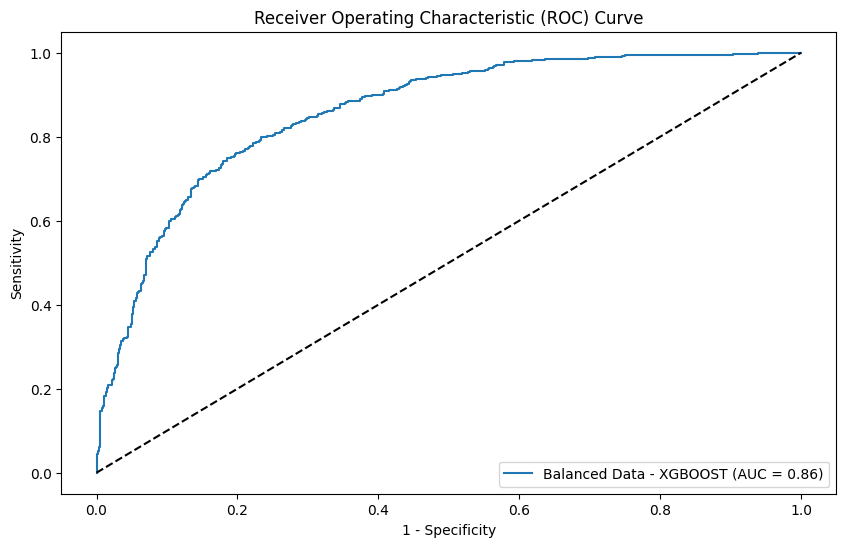

In [19]:
# Undersampling - AUC scores
# fpr - false positive rate
# tpr - true positive rate
# threshold - part of the decision function used to calculate fpr and tpr

fpr_rus, tpr_rus, threshold_rus = roc_curve(y_test_rus, y_prob_rus[:,1])


plt.figure(figsize = (10, 6))

plt.plot(fpr_rus, tpr_rus, label = f'Balanced Data - XGBOOST (AUC = {rus_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line representing random classifier

plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')

plt.show()

## E. Important Features 


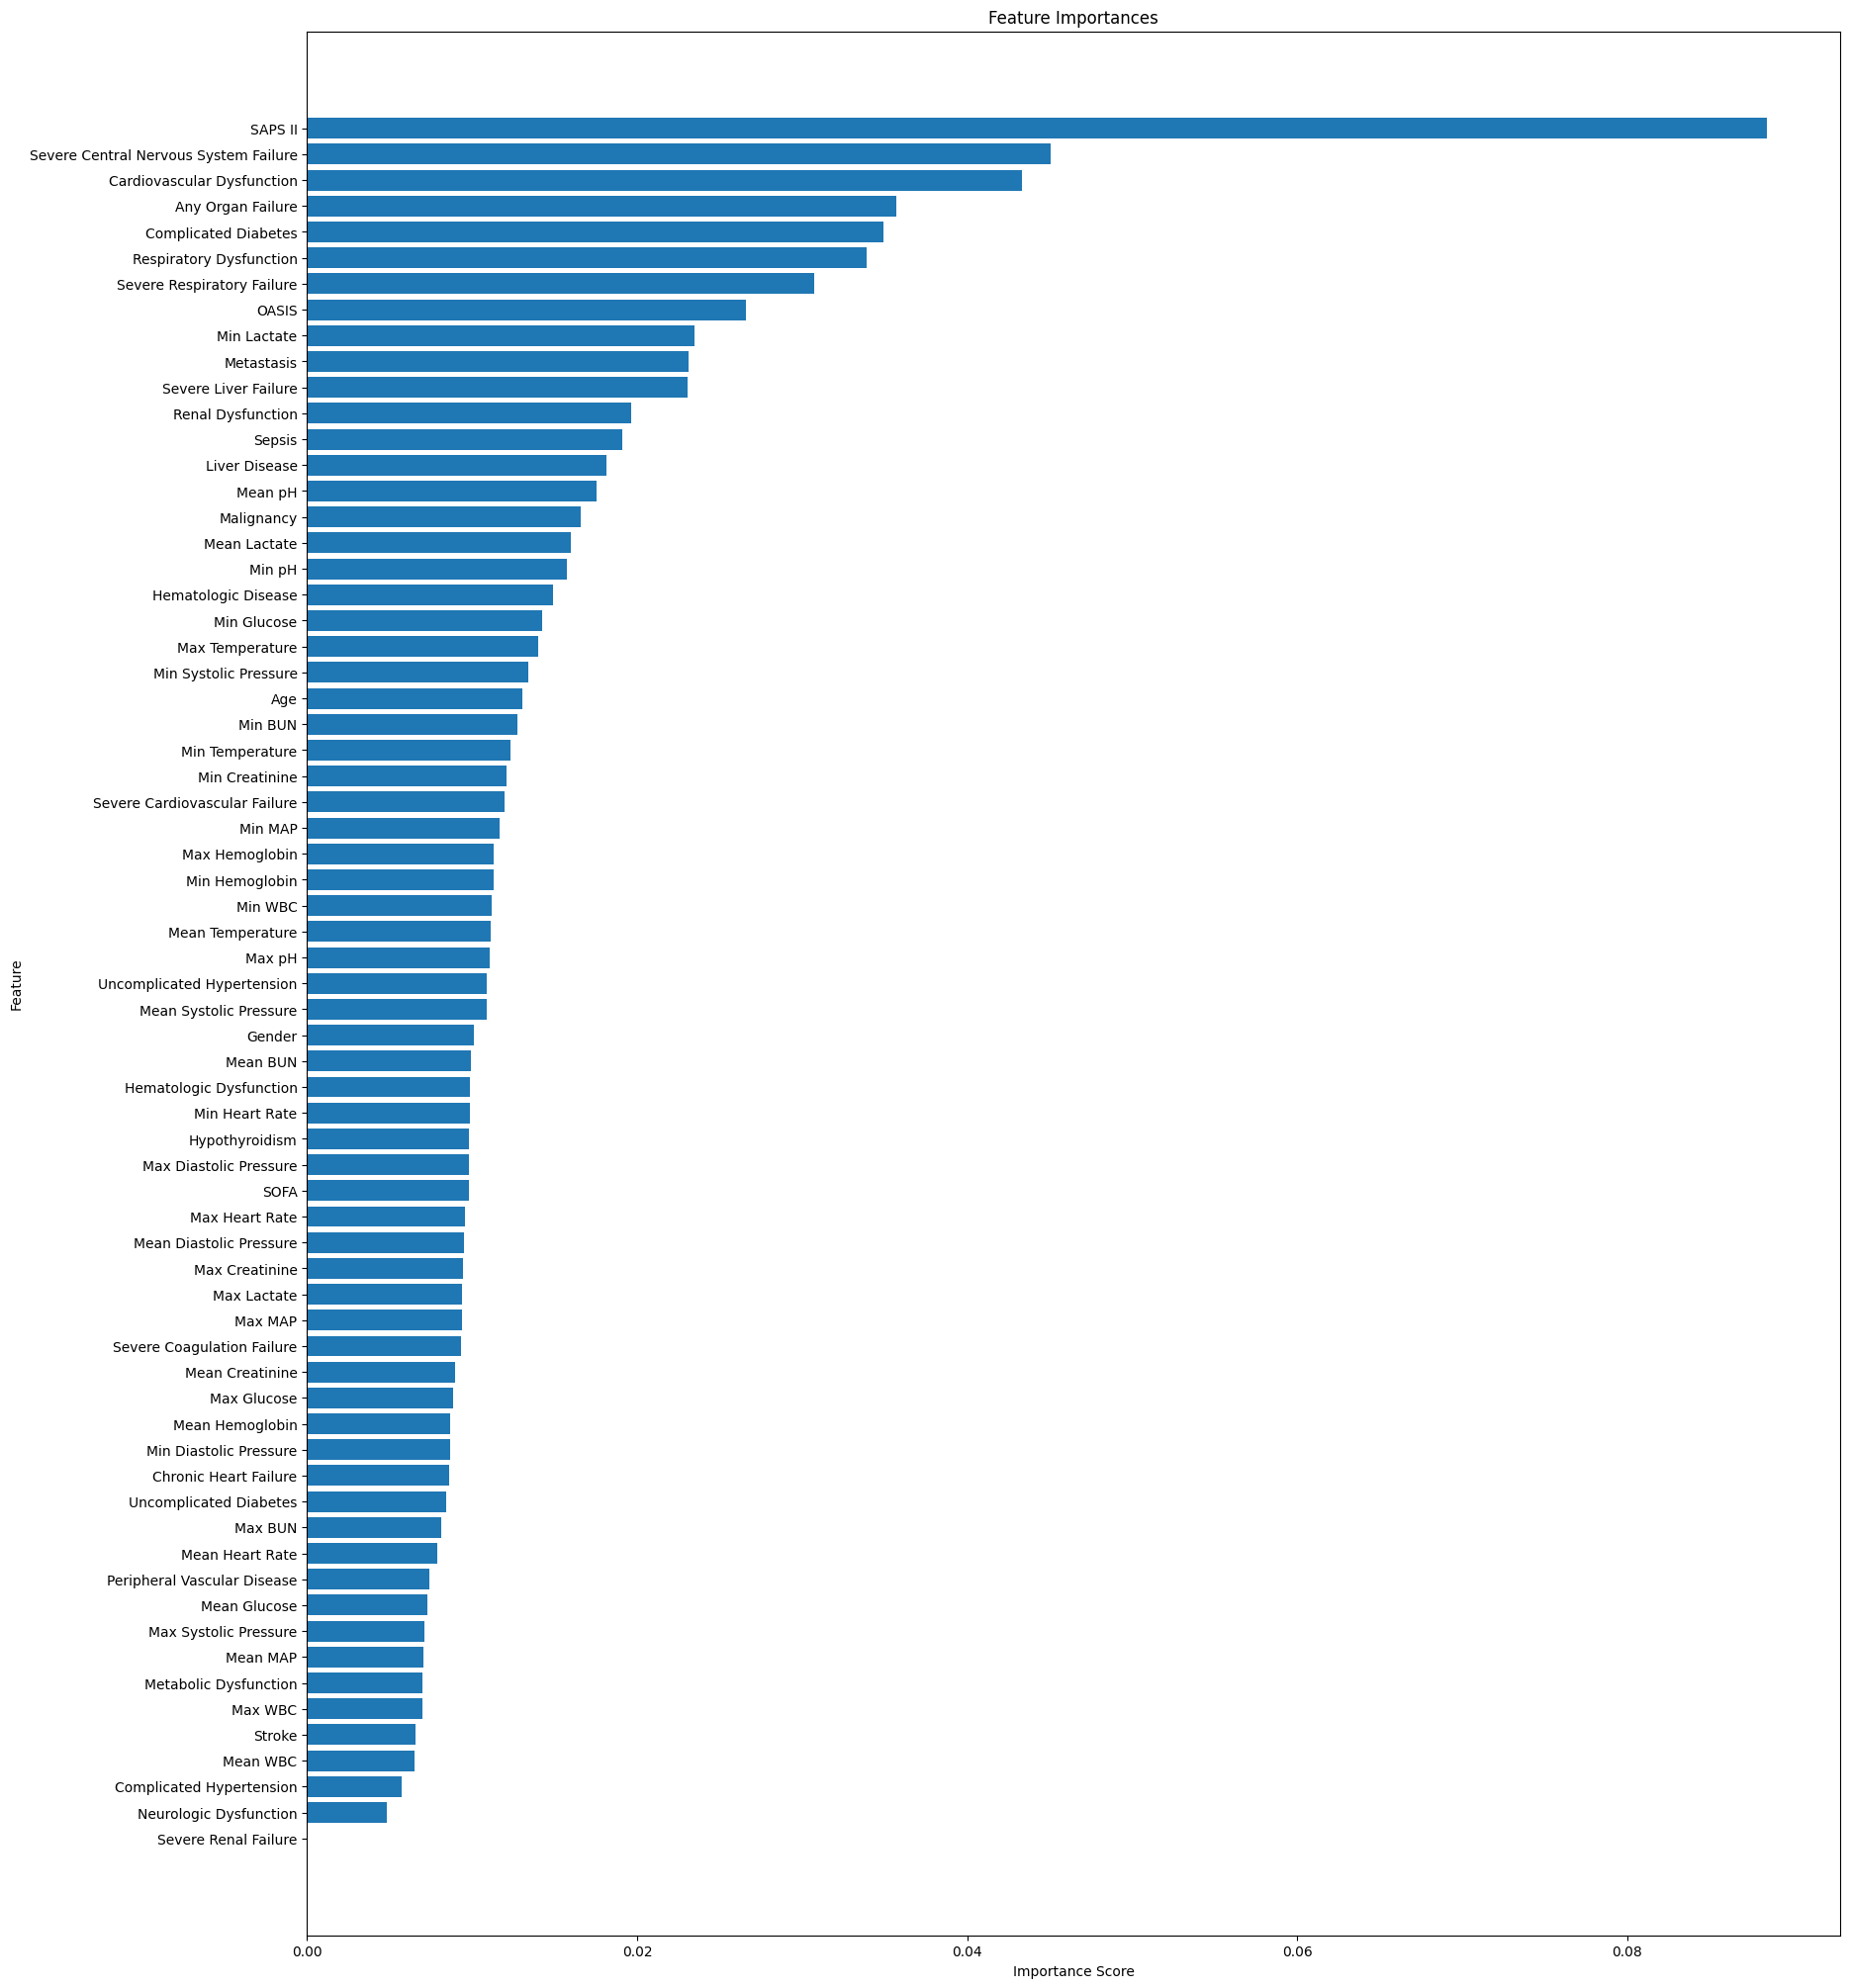

In [20]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_rus.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(20, 25))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.yticks(range(len(feature_importance_df)), feature_importance_df['Feature'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [21]:
# Add the predicted values to the original DataFrame
imputed_test = raw_data.iloc[X_test_rus.index, :].copy()  # Copy the relevant rows from the original DataFrame
imputed_test['y_pred'] = y_pred

# Display the DataFrame with predicted values
imputed_test.head()

,Unnamed: 0,Hospital Mortality,Age,Gender,Uncomplicated Hypertension,Complicated Hypertension,Uncomplicated Diabetes,Complicated Diabetes,Malignancy,Hematologic Disease,...,Max BUN,Min BUN,Mean BUN,Max Creatinine,Min Creatinine,Mean Creatinine,Max Hemoglobin,Min Hemoglobin,Mean Hemoglobin,y_pred
8561,13573,0,69,1,0,1,0,0,1,0,...,17.0,15.0,16.2,1.3,1.0,1.16,14.4,11.1,12.59,0
9989,15462,0,68,1,1,0,0,0,0,0,...,18.0,12.0,15.0,1.0,0.7,0.87,14.7,10.8,12.20,0
11554,17580,0,51,0,0,0,0,0,0,0,...,19.0,17.0,18.2,1.3,0.7,0.94,9.8,9.4,9.63,0
10675,16399,0,66,0,1,0,0,0,0,1,...,9.0,7.0,8.0,0.6,0.6,0.60,8.7,8.5,8.60,0
1734,3088,0,86,1,1,0,0,0,1,0,...,14.0,14.0,14.0,0.6,0.5,0.55,13.2,11.6,12.43,0
